## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors as colors



### Read data

In [2]:
data = pd.read_csv("churn.csv")
data.sample(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
2513  9565-AXSMR    Male              0     Yes        Yes      52   
5917  5144-PQCDZ    Male              0      No         No       4   
349   4654-DLAMQ  Female              1     Yes         No      64   
4187  2642-MAWLJ  Female              0     Yes        Yes      36   
1559  9818-XQCUV  Female              0      No         No       2   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
2513          Yes            No              No  No internet service  ...   
5917          Yes            No              No  No internet service  ...   
349           Yes            No     Fiber optic                  Yes  ...   
4187          Yes            No              No  No internet service  ...   
1559          Yes            No              No  No internet service  ...   

         DeviceProtection          TechSupport          StreamingTV  \
2513  No internet service  No internet service  No internet service   
5917  No internet service  No internet service  No internet service   
349                   Yes                   No                   No   
4187  No internet service  No internet service  No internet service   
1559  No internet service  No internet service  No internet service   

          StreamingMovies        Contract PaperlessBilling  \
2513  No internet service        Two year               No   
5917  No internet service  Month-to-month              Yes   
349                   Yes        One year               No   
4187  No internet service        Two year               No   
1559  No internet service  Month-to-month               No   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
2513               Mailed check          19.20       1054.75    No  
5917               Mailed check          19.95         59.25    No  
349   Bank transfer (automatic)          97.00        6430.9    No  
4187  Bank transfer (automatic)          20.25        717.95    No  
1559               Mailed check          20.35          45.3    No  

[5 rows x 21 columns]

### Exploratory data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:


churn_counts = data["Churn"].value_counts()

fig = px.pie(np.array(churn_counts), 
             names=churn_counts.index, 
             title="Churn Rate",
             color_discrete_sequence=["#0077B6", "#FF7600"],
             hole=0.5  # Create a donut chart by setting the hole parameter
             )

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    title_font=dict(size=20),
    font=dict(family="Arial", size=12),
    legend=dict(title="Churn", orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(l=20, r=20, t=80, b=20),
)

fig.show()


In [5]:
# Calculate churn count
churn_count = data['Churn'].value_counts()

fig = px.bar(data_frame=churn_count, x=churn_count.index, y=churn_count.values,
             color=churn_count.index, color_discrete_sequence=["#0077B6", "#FF7600"],
             labels={'x': 'Churn', 'y': 'Count'},
             title='Churn Count')

# Add shadow effect
fig.update_traces(marker=dict(line=dict(color='rgba(0,0,0,0.5)', width=1)),
                  base=dict(color='rgba(0,0,0,0.3)', size=5, opacity=0.5))

fig.update_layout(plot_bgcolor='rgb(255, 255, 255)')

fig.show()


In [6]:
# Calculate churn percentage
churn_percentage = data['Churn'].value_counts(normalize=True) * 100

fig = go.Figure(data=[go.Pie(labels=churn_percentage.index, values=churn_percentage.values)])

colors = ['#636EFA', '#FF7600']  # Define custom colors
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=14,
                  marker=dict(colors=colors, line=dict(color='white', width=1)))

fig.update_layout(title='Churn Percentage', showlegend=False,
                  plot_bgcolor='white', paper_bgcolor='white',
                  margin=dict(l=0, r=0, t=50, b=0))

# Custom legend
fig.update_layout(
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99,
        bgcolor='rgba(255, 255, 255, 0.7)',
        bordercolor='rgba(0, 0, 0, 0.2)',
        borderwidth=1
    )
)


fig.show()

In [7]:

fig = go.Figure(data=[go.Histogram(x=data['MonthlyCharges'], nbinsx=20)])

fig.update_traces(marker=dict(color='#636EFA', line=dict(color='white', width=0.5)))
fig.update_layout(
    title='Distribution of Monthly Charges',
    xaxis=dict(title='Monthly Charges', title_font=dict(size=12), tickfont=dict(size=10)),
    yaxis=dict(title='Frequency', title_font=dict(size=12), tickfont=dict(size=10)),
    plot_bgcolor='white',
    paper_bgcolor='white',
    bargap=0.02,
    margin=dict(l=60, r=20, t=60, b=20),
    hoverlabel=dict(bgcolor='#F9FAFB'),
)

fig.show()


In [8]:
fig = px.box(data_frame=data, x='Churn', y='MonthlyCharges', color='Churn',
             labels={'Churn': 'Churn', 'MonthlyCharges': 'Monthly Charges'},
             title='Monthly Charges by Churn')

fig.update_traces(marker=dict(size=4, line=dict(width=1, color='gray')),
                  boxmean=True, boxpoints='outliers')

fig.update_layout(xaxis=dict(showgrid=False, zeroline=False),
                  yaxis=dict(title='Monthly Charges', showgrid=True),
                  plot_bgcolor='white', showlegend=False)

fig.show()

In [9]:

fig = go.Figure(data=go.Scatter(x=data['tenure'], y=data['MonthlyCharges'], mode='markers'))

fig.update_traces(marker=dict(size=8, color='#636EFA', line=dict(width=0.5, color='white')),
                  hovertemplate='Tenure: %{x}<br>Monthly Charges: %{y}')

fig.update_layout(
    xaxis=dict(title='Tenure', title_font=dict(size=12), tickfont=dict(size=10)),
    yaxis=dict(title='Monthly Charges', title_font=dict(size=12), tickfont=dict(size=10)),
    title='Tenure vs. Monthly Charges',
    plot_bgcolor='white',
    paper_bgcolor='white',
    hovermode='closest',
    hoverlabel=dict(bgcolor='#F9FAFB', font=dict(size=12)),
    margin=dict(l=60, r=20, t=60, b=20)
)

fig.show()

In [10]:
contract_count = data['Contract'].value_counts()

fig = go.Figure(data=go.Bar(x=contract_count.index, y=contract_count.values,
                           marker=dict(color='#636EFA', line=dict(color='white', width=0.5)),
                           text=contract_count.values, textposition='auto'))

fig.update_layout(
    title='Contract Types',
    xaxis=dict(title='Contract', title_font=dict(size=14), tickfont=dict(size=12)),
    yaxis=dict(title='Count', title_font=dict(size=14), tickfont=dict(size=12)),
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(l=60, r=20, t=60, b=20),
    hovermode='x',
    hoverlabel=dict(bgcolor='#F9FAFB', font=dict(size=12)),
    showlegend=False
)

fig.show()

In [11]:

internet_churn = data.groupby(['InternetService', 'Churn']).size().unstack()

# Define a color palette for each stack
color_palette = ['blue', 'orange', 'green']  # Example color palette
fig = go.Figure()

for i, churn_status in enumerate(internet_churn.columns):
    fig.add_trace(go.Bar(
        x=internet_churn.index,
        y=internet_churn[churn_status],
        name=churn_status,
        marker_color=color_palette[i % len(color_palette)]
    ))

fig.update_layout(
    title='Internet Service vs. Churn',
    xaxis=dict(title='Internet Service', title_font=dict(size=14), tickfont=dict(size=12)),
    yaxis=dict(title='Count', title_font=dict(size=14), tickfont=dict(size=12)),
    barmode='stack',
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(l=60, r=20, t=60, b=20),
    hovermode='x',
    hoverlabel=dict(bgcolor='#F9FAFB', font=dict(size=12)),
    showlegend=True,
    legend=dict(font=dict(size=12))
)

fig.show()

In [12]:

monthly_charges_over_time = data.groupby('tenure')['MonthlyCharges'].mean()

fig = go.Figure(data=go.Scatter(x=monthly_charges_over_time.index, y=monthly_charges_over_time.values,
                               mode='lines', marker_color='#636EFA'))

fig.update_layout(
    title='Monthly Charges over Time',
    xaxis=dict(title='Tenure', title_font=dict(size=14), tickfont=dict(size=12)),
    yaxis=dict(title='Average Monthly Charges', title_font=dict(size=14), tickfont=dict(size=12)),
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(l=60, r=20, t=60, b=20),
    hovermode='x',
    hoverlabel=dict(bgcolor='#F9FAFB', font=dict(size=12))
)

fig.show()


In [13]:
corr_matrix = data.corr()

fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.index,
    colorscale='RdBu',
    zmin=-1,
    zmax=1,
    hovertemplate='x: %{x}<br>y: %{y}<br>correlation: %{z:.2f}<extra></extra>'
))

fig.update_layout(
    title='Correlation Matrix',
    xaxis=dict(title='Features', title_font=dict(size=14), tickfont=dict(size=12)),
    yaxis=dict(title='Features', title_font=dict(size=14), tickfont=dict(size=12)),
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(l=60, r=20, t=60, b=20),
    hovermode='closest',
    hoverlabel=dict(bgcolor='#F9FAFB', font=dict(size=12)),
    coloraxis=dict(
        colorbar=dict(
            title='Correlation',
            titleside='right',
            tickfont=dict(size=12),
            tickmode='array',
            tickvals=[-1, -0.5, 0, 0.5, 1],
            ticktext=['-1.0', '-0.5', '0.0', '0.5', '1.0']
        )
    )
)

fig.show()





In [14]:
d=data
# Convert Yes/No values to boolean for Churn column
d["Churn"] = d["Churn"].map({"Yes": True, "No": False})

# Dense 3D Hyperplane Graph 1
fig1 = go.Figure(data=[
    go.Scatter3d(
        x=d["MonthlyCharges"],
        y=d["TotalCharges"],
        z=d["tenure"],
        mode="markers",
        marker=dict(
            size=3,
            color=d["Churn"],
            colorscale="Viridis",
            opacity=0.8,
        )
    )
])

fig1.update_layout(
    scene=dict(
        xaxis_title="Monthly Charges",
        yaxis_title="Total Charges",
        zaxis_title="Tenure",
        camera=dict(
            eye=dict(x=-1.2, y=-1.2, z=0.8)
        )
    ),
    title=" Tenure vs. Monthly Charges vs. Total Charges",
    margin=dict(l=0, r=0, b=0, t=40),
)
fig1.show()



In [15]:
d=data
# Convert Yes/No values to boolean for Churn column
d["Churn"] = d["Churn"].map({"Yes": True, "No": False})

# Dense 3D Hyperplane Graph 2
fig2 = go.Figure(data=[
    go.Scatter3d(
        x=data["MonthlyCharges"],
        y=data["tenure"],
        z=data["TotalCharges"],
        mode="markers",
        marker=dict(
            size=3,
            color=data["Churn"],
            colorscale="RdYlBu",
            opacity=0.8,
            colorbar=dict(title="Churn"),
            symbol="circle",
            line=dict(color="black", width=0.2),
        ),
        hovertemplate=
        "<b>Monthly Charges:</b> %{x}<br>" +
        "<b>Tenure:</b> %{y}<br>" +
        "<b>Total Charges:</b> %{z}<br>" +
        "<b>Churn:</b> %{marker.color}<extra></extra>"
    )
])

fig2.update_layout(
    scene=dict(
        xaxis_title="Monthly Charges",
        yaxis_title="Tenure",
        zaxis_title="Total Charges",
        camera=dict(
            eye=dict(x=0.4, y=0.4, z=0.4),
            up=dict(x=0, y=0, z=1)
        ),
        aspectratio=dict(x=1, y=1, z=0.7),
        bgcolor="rgb(240, 240, 240)"
    ),
    title="Monthly Charges vs. Tenure vs. Total Charges",
    margin=dict(l=0, r=0, b=0, t=40),
)
fig2.show()


In [16]:
import plotly.graph_objects as go

# Create the wireframe plot
fig = go.Figure(data=[go.Scatter3d(x=data['MonthlyCharges'], y=data['TotalCharges'], z=data['tenure'],
                                  mode='lines', line=dict(width=2, color='blue'))])

# Customize the layout
fig.update_layout(title='Churn Prediction - 3D Wireframe Plot',
                  scene=dict(xaxis_title='Monthly Charges',
                             yaxis_title='Total Charges',
                             zaxis_title='Tenure'))

# Show the plot
fig.show()


In [17]:
# Create the contour plot
fig = go.Figure(data=[
    go.Scatter3d(
        x=data['MonthlyCharges'],
        y=data['TotalCharges'],
        z=data['tenure'],
        mode='markers',
        marker=dict(
            size=5,
            color=data['Churn'],
            colorscale='Viridis',
            opacity=0.8
        )
    ),
    go.Mesh3d(
        x=data['MonthlyCharges'],
        y=data['TotalCharges'],
        z=data['tenure'],
        alphahull=5,
        color='lightblue'
    )
])

# Customize the layout
fig.update_layout(
    title='Churn Prediction - 3D Contour Plot',
    scene=dict(
        xaxis_title='Monthly Charges',
        yaxis_title='Total Charges',
        zaxis_title='Tenure'
    )
)

# Show the plot
fig.show()

In [18]:
import plotly.figure_factory as ff
# Select the features
features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Filter the data for the selected features
data_filtered = data[features]

# Convert Yes/No values to boolean for Churn column
data_filtered["Churn"] = data_filtered["Churn"].map({"Yes": True, "No": False})

# Create a scatter matrix
scatter_matrix = ff.create_scatterplotmatrix(data_filtered, diag='histogram', index='Churn',
                                             colormap='Viridis', colormap_type='cat')

# Update the layout
scatter_matrix.update_layout(title='Pair Plot of Select Features', width=800, height=800)

# Show the plot
scatter_matrix.show()

In [19]:
data.shape

(7043, 21)

In [20]:
data.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [21]:
# distribution of customers who churn

data['Churn'].value_counts()

Series([], Name: Churn, dtype: int64)

In [22]:
# check the nulls
data.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn               7043
dtype: int64

In [23]:
# Compare the values for both churns
data.groupby('Churn').mean()

Empty DataFrame
Columns: [SeniorCitizen, tenure, MonthlyCharges]
Index: []

Frauds transactions are more than the legit transactions

### Data Preprocessing

In [24]:
df =pd.read_csv("churn.csv")

In [25]:
## Encoding the data
from sklearn.preprocessing import LabelEncoder

cat_cols =[x for x in df.columns if df[x].dtype=="object"]

le=LabelEncoder()

df = df.apply(lambda cat_cols: le.fit_transform(cat_cols.astype(str)), axis=0, result_type='expand')

In [26]:
df.drop(columns="customerID",inplace=True)

In [27]:
df.sample(5)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
1908       1              0        0           0      66             1   
5634       0              0        1           1       1             1   
6737       0              0        1           0      60             1   
1691       1              0        1           1      57             1   
4221       1              0        0           0       1             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
1908              0                2               1             1   
5634              0                2               1             1   
6737              2                1               0             2   
1691              0                2               1             1   
4221              0                2               1             1   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
1908                 1            1            1                1         2   
5634                 1            1            1                1         0   
6737                 2            2            2                2         2   
1691                 1            1            1                1         2   
4221                 1            1            1                1         0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
1908                 0              1             332           728      0  
5634                 1              2             331          1492      1  
6737                 1              0             174          5404      0  
1691                 0              1             326           304      0  
4221                 0              1             319          1481      0

In [28]:
X = df.drop(columns = 'Churn',axis = 1)
y = df['Churn']

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7043 non-null   int32
 1   SeniorCitizen     7043 non-null   int32
 2   Partner           7043 non-null   int32
 3   Dependents        7043 non-null   int32
 4   tenure            7043 non-null   int32
 5   PhoneService      7043 non-null   int32
 6   MultipleLines     7043 non-null   int32
 7   InternetService   7043 non-null   int32
 8   OnlineSecurity    7043 non-null   int32
 9   OnlineBackup      7043 non-null   int32
 10  DeviceProtection  7043 non-null   int32
 11  TechSupport       7043 non-null   int32
 12  StreamingTV       7043 non-null   int32
 13  StreamingMovies   7043 non-null   int32
 14  Contract          7043 non-null   int32
 15  PaperlessBilling  7043 non-null   int32
 16  PaymentMethod     7043 non-null   int32
 17  MonthlyCharges    7043 non-null  

Splitting dataset

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y, random_state = 23)
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(5634, 19) (1409, 19) (5634,) (1409,)


### Modelling

In [31]:
# Train SVM linear
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
svm_linear_pred = svm_linear.predict(X_test)

In [32]:
# Train SVM rbf
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
svm_rbf_pred = svm_rbf.predict(X_test)

In [33]:
# Train SVM rbf with hyperparameters
svm_rbf_hyper = SVC(kernel='rbf', C=10, gamma=0.1)
svm_rbf_hyper.fit(X_train, y_train)
svm_rbf_hyper_pred = svm_rbf_hyper.predict(X_test)

In [34]:
# Train Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
logistic_regression_pred = logistic_regression.predict(X_test)

In [35]:
# Train Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_test)


In [36]:
# Train XGBoost
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)
xgboost_pred = xgboost.predict(X_test)

In [37]:
# Train CNN
cnn = Sequential()
# Add layers to the CNN model
cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(19, 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10, batch_size=32)
cnn_pred = cnn.predict(X_test)

Epoch 1/10
177/177 [==============================] - 3s 5ms/step - loss: 0.7582 - accuracy: 0.7206
Epoch 2/10
177/177 [==============================] - 1s 5ms/step - loss: 0.6810 - accuracy: 0.7354
Epoch 3/10
177/177 [==============================] - 1s 5ms/step - loss: 0.5556 - accuracy: 0.7499
Epoch 4/10
177/177 [==============================] - 1s 5ms/step - loss: 0.5178 - accuracy: 0.7595
Epoch 5/10
177/177 [==============================] - 1s 5ms/step - loss: 0.5139 - accuracy: 0.7597
Epoch 6/10
177/177 [==============================] - 1s 5ms/step - loss: 0.5134 - accuracy: 0.7551
Epoch 7/10
177/177 [==============================] - 1s 5ms/step - loss: 0.4699 - accuracy: 0.7648
Epoch 8/10
177/177 [==============================] - 1s 5ms/step - loss: 0.4869 - accuracy: 0.7670
Epoch 9/10
177/177 [==============================] - 1s 5ms/step - loss: 0.4613 - accuracy: 0.7730
Epoch 10/10
45/45 [==============================] - 0s 3ms/step


In [38]:
# Train RNN
rnn = Sequential()
# Add layers to the RNN model
rnn.add(LSTM(64, input_shape=(19, 1)))
rnn.add(Dense(1, activation='sigmoid'))
rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn.fit(X_train, y_train, epochs=10, batch_size=32)
rnn_pred = rnn.predict(X_test)

Epoch 1/10
177/177 [==============================] - 9s 22ms/step - loss: 0.5451 - accuracy: 0.7343
Epoch 2/10
177/177 [==============================] - 4s 22ms/step - loss: 0.5157 - accuracy: 0.7467
Epoch 3/10
177/177 [==============================] - 4s 21ms/step - loss: 0.5018 - accuracy: 0.7520
Epoch 4/10
177/177 [==============================] - 4s 22ms/step - loss: 0.5005 - accuracy: 0.7524
Epoch 5/10
177/177 [==============================] - 4s 22ms/step - loss: 0.4950 - accuracy: 0.7547
Epoch 6/10
177/177 [==============================] - 3s 18ms/step - loss: 0.4886 - accuracy: 0.7556
Epoch 7/10
177/177 [==============================] - 4s 22ms/step - loss: 0.4855 - accuracy: 0.7581
Epoch 8/10
177/177 [==============================] - 4s 22ms/step - loss: 0.4813 - accuracy: 0.7625
Epoch 9/10
177/177 [==============================] - 4s 21ms/step - loss: 0.4778 - accuracy: 0.7641
Epoch 10/10
45/45 [==============================] - 1s 8ms/step


In [39]:
# Calculate evaluation metrics
svm_linear_accuracy = accuracy_score(y_test, svm_linear_pred)
svm_linear_recall = recall_score(y_test, svm_linear_pred)
svm_linear_precision = precision_score(y_test, svm_linear_pred)
svm_linear_f1 = f1_score(y_test, svm_linear_pred)
svm_linear_roc_auc = roc_auc_score(y_test, svm_linear_pred)

svm_rbf_accuracy = accuracy_score(y_test, svm_rbf_pred)
svm_rbf_recall = recall_score(y_test, svm_rbf_pred)
svm_rbf_precision = precision_score(y_test, svm_rbf_pred)
svm_rbf_f1 = f1_score(y_test, svm_rbf_pred)
svm_rbf_roc_auc = roc_auc_score(y_test, svm_rbf_pred)

svm_rbf_hyper_accuracy = accuracy_score(y_test, svm_rbf_hyper_pred)
svm_rbf_hyper_recall = recall_score(y_test, svm_rbf_hyper_pred)
svm_rbf_hyper_precision = precision_score(y_test, svm_rbf_hyper_pred)
svm_rbf_hyper_f1 = f1_score(y_test, svm_rbf_hyper_pred)
svm_rbf_hyper_roc_auc = roc_auc_score(y_test, svm_rbf_hyper_pred)

logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_pred)
logistic_regression_recall = recall_score(y_test, logistic_regression_pred)
logistic_regression_precision = precision_score(y_test, logistic_regression_pred)
logistic_regression_f1 = f1_score(y_test, logistic_regression_pred)
logistic_regression_roc_auc = roc_auc_score(y_test, logistic_regression_pred)

random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
random_forest_recall = recall_score(y_test, random_forest_pred)
random_forest_precision = precision_score(y_test, random_forest_pred)
random_forest_f1 = f1_score(y_test, random_forest_pred)
random_forest_roc_auc = roc_auc_score(y_test, random_forest_pred)

xgboost_accuracy = accuracy_score(y_test, xgboost_pred)
xgboost_recall = recall_score(y_test, xgboost_pred)
xgboost_precision = precision_score(y_test, xgboost_pred)
xgboost_f1 = f1_score(y_test, xgboost_pred)
xgboost_roc_auc = roc_auc_score(y_test, xgboost_pred)

# Convert predicted probabilities to class labels
cnn_pred = cnn_pred.flatten()
cnn_pred = np.round(cnn_pred).astype(int)

cnn_accuracy = accuracy_score(y_test, cnn_pred)
cnn_recall = recall_score(y_test, cnn_pred)
cnn_precision = precision_score(y_test, cnn_pred)
cnn_f1 = f1_score(y_test, cnn_pred)
cnn_roc_auc = roc_auc_score(y_test, cnn_pred)

# Convert predicted probabilities to class labels
rnn_pred = rnn_pred.flatten()
rnn_pred = np.round(rnn_pred).astype(int)


rnn_accuracy = accuracy_score(y_test, rnn_pred)
rnn_recall = recall_score(y_test, rnn_pred)
rnn_precision = precision_score(y_test, rnn_pred)
rnn_f1 = f1_score(y_test, rnn_pred)
rnn_roc_auc = roc_auc_score(y_test, rnn_pred)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



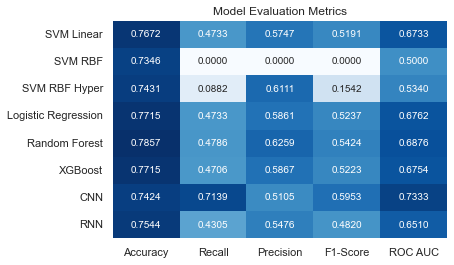

In [40]:

# Create a dictionary to store the evaluation metrics
metrics = {
    'Model': ['SVM Linear', 'SVM RBF', 'SVM RBF Hyper', 'Logistic Regression', 'Random Forest', 'XGBoost', 'CNN', 'RNN'],
    'Accuracy': [svm_linear_accuracy, svm_rbf_accuracy, svm_rbf_hyper_accuracy, logistic_regression_accuracy,
                 random_forest_accuracy, xgboost_accuracy, cnn_accuracy, rnn_accuracy],
    'Recall': [svm_linear_recall, svm_rbf_recall, svm_rbf_hyper_recall, logistic_regression_recall,
               random_forest_recall, xgboost_recall, cnn_recall, rnn_recall],
    'Precision': [svm_linear_precision, svm_rbf_precision, svm_rbf_hyper_precision, logistic_regression_precision,
                  random_forest_precision, xgboost_precision, cnn_precision, rnn_precision],
    'F1-Score': [svm_linear_f1, svm_rbf_f1, svm_rbf_hyper_f1, logistic_regression_f1,
                 random_forest_f1, xgboost_f1, cnn_f1, rnn_f1],
    'ROC AUC': [svm_linear_roc_auc, svm_rbf_roc_auc, svm_rbf_hyper_roc_auc, logistic_regression_roc_auc,
                random_forest_roc_auc, xgboost_roc_auc, cnn_roc_auc, rnn_roc_auc]
}

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Set the "Model" column as the index
metrics_df.set_index('Model', inplace=True)

# Set the style of the table using seaborn
sns.set(style='whitegrid')

# Display the table using seaborn
sns_table = sns.heatmap(metrics_df, annot=True, fmt=".4f", cmap='Blues', cbar=False)
sns_table.set_title('Model Evaluation Metrics')
sns_table.set_xlabel('')
sns_table.set_ylabel('')

# Show the table
plt.show()


In [41]:
lr =  LogisticRegression()
lr.fit(X_train,y_train)
preds = lr.predict(X_test)
pred = accuracy_score(preds, y_test)
pred

0.7714691270404542

preparing datasets for FL

In [42]:
# Create new data out of the samples
df.to_csv("data1.csv")
df.to_csv("data2.csv")

In [43]:
# shuffle the data

df_shuffled = shuffle(df, random_state=42)

In [44]:
sample_size = 3522
s_size = 7000

In [45]:
sample1 = df_shuffled[:sample_size].copy()

In [46]:
sample2 = df_shuffled[sample_size:].copy()

In [47]:
sample1.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
185        0              0        1           0       1             0   
2715       1              0        0           0      36             1   
3825       0              0        1           1      48             1   
1807       0              0        0           0       1             1   
132        1              0        0           0      64             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
185               1                0               0             0   
2715              2                2               1             1   
3825              0                2               1             1   
1807              0                1               0             0   
132               0                0               0             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
185                  0            0            0                0         0   
2715                 1            1            1                1         0   
3825                 1            1            1                1         2   
1807                 2            0            0                0         0   
132                  0            2            0                0         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
185                  1              2             392          2044      1  
2715                 1              0             401          6522      0  
3825                 0              3             320            67      0  
1807                 0              2            1138          5822      1  
132                  0              0             691          2837      0

In [48]:
sample2.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
2767       0              0        0           1      41             1   
4712       1              0        1           1      46             1   
6064       1              0        0           0       1             0   
942        1              0        0           0      17             1   
1036       1              0        1           1      65             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
2767              2                1               0             0   
4712              2                1               2             2   
6064              1                0               0             0   
942               0                1               0             0   
1036              2                1               2             2   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
2767                 2            2            0                0         0   
4712                 2            0            2                2         1   
6064                 0            0            2                2         0   
942                  0            0            0                2         0   
1036                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
2767                 1              0            1295          3384      0  
4712                 1              2             155          4512      0  
6064                 1              3             615          3816      1  
942                  1              1            1201          1628      0  
1036                 1              0             259          5934      0

In [49]:
# Create new data out of the samples
sample1.to_csv("data1.csv")
sample2.to_csv("data2.csv")

In [50]:
df1 = df_shuffled[df_shuffled['gender'] == 0] 
df2 = df_shuffled[df_shuffled['gender'] == 1] 
print(df1.shape)
print(df2.shape)

(3488, 20)
(3555, 20)


In [51]:
# Create new data out of the samples
df1.to_csv("data3.csv")
df2.to_csv("data4.csv")

In [52]:
df_shuffled.to_csv("data5.csv")